In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import math
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

In [22]:
stock=yf.download("TCS.BO",period="5y",actions=True)
stock

c:\Program Files\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2019-02-25,1927.150024,1990.000000,1927.150024,1985.000000,1916.598755,124746,0.0,0.0
2019-02-26,1977.000000,2038.650024,1969.900024,2032.349976,1962.317017,217075,0.0,0.0
2019-02-27,2037.000000,2070.000000,2020.849976,2053.750000,1982.979736,142848,0.0,0.0
2019-02-28,2065.000000,2070.000000,1977.849976,1984.250000,1915.874634,342425,0.0,0.0
2019-03-01,1990.000000,2005.949951,1982.500000,1991.650024,1923.019653,141607,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-02-19,4119.149902,4121.649902,4055.100098,4101.600098,4101.600098,56840,0.0,0.0
2024-02-20,4089.899902,4098.850098,4011.100098,4029.949951,4029.949951,30284,0.0,0.0
2024-02-21,4018.850098,4063.000000,3980.000000,3989.300049,3989.300049,24380,0.0,0.0


<Axes: xlabel='Date', ylabel='Close'>

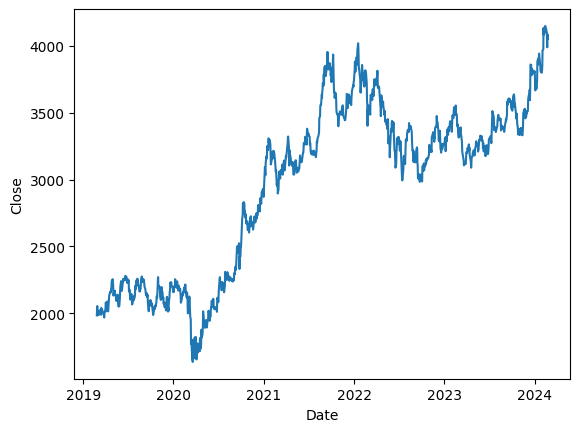

In [23]:
sns.lineplot(data=stock,x="Date",y="Close")

In [24]:
data=stock.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.75)
training_data_len

912

In [25]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.13883529],
       [0.15767693],
       [0.16619249],
       ...,
       [0.93639209],
       [0.97505026],
       [0.96132192]])

In [26]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    

In [27]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(852, 60, 1)

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [30]:
model.fit(x_train,y_train,epochs=10,batch_size=1)

Epoch 1/10
852/852 [==============================] - 14s 13ms/step - loss: 0.0038
Epoch 2/10
852/852 [==============================] - 12s 14ms/step - loss: 0.0015
Epoch 3/10
852/852 [==============================] - 11s 12ms/step - loss: 0.0011
Epoch 4/10
852/852 [==============================] - 10s 12ms/step - loss: 9.2832e-04
Epoch 5/10
852/852 [==============================] - 11s 13ms/step - loss: 8.1845e-04
Epoch 6/10
852/852 [==============================] - 10s 12ms/step - loss: 8.2336e-04
Epoch 7/10
852/852 [==============================] - 10s 12ms/step - loss: 7.4425e-04
Epoch 8/10
852/852 [==============================] - 11s 13ms/step - loss: 6.4951e-04
Epoch 9/10
852/852 [==============================] - 11s 13ms/step - loss: 6.0480e-04
Epoch 10/10
852/852 [==============================] - 12s 14ms/step - loss: 5.8963e-04


In [31]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [32]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [33]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


10/10 [==============================] - 1s 9ms/step


In [34]:
rmse= np.sqrt(((predictions - y_test) ** 2).mean())
rmse

61.50312368400878

In [35]:
closes=[]
closes.extend(data['Close'])
average_close = sum(closes) / len(closes)
#print(average_close)
average_deviation=rmse/average_close*100
average_deviation


2.079890407135452

In [36]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions


C:\Users\Omkar Singh\AppData\Local\Temp\ipykernel_28708\1407704556.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



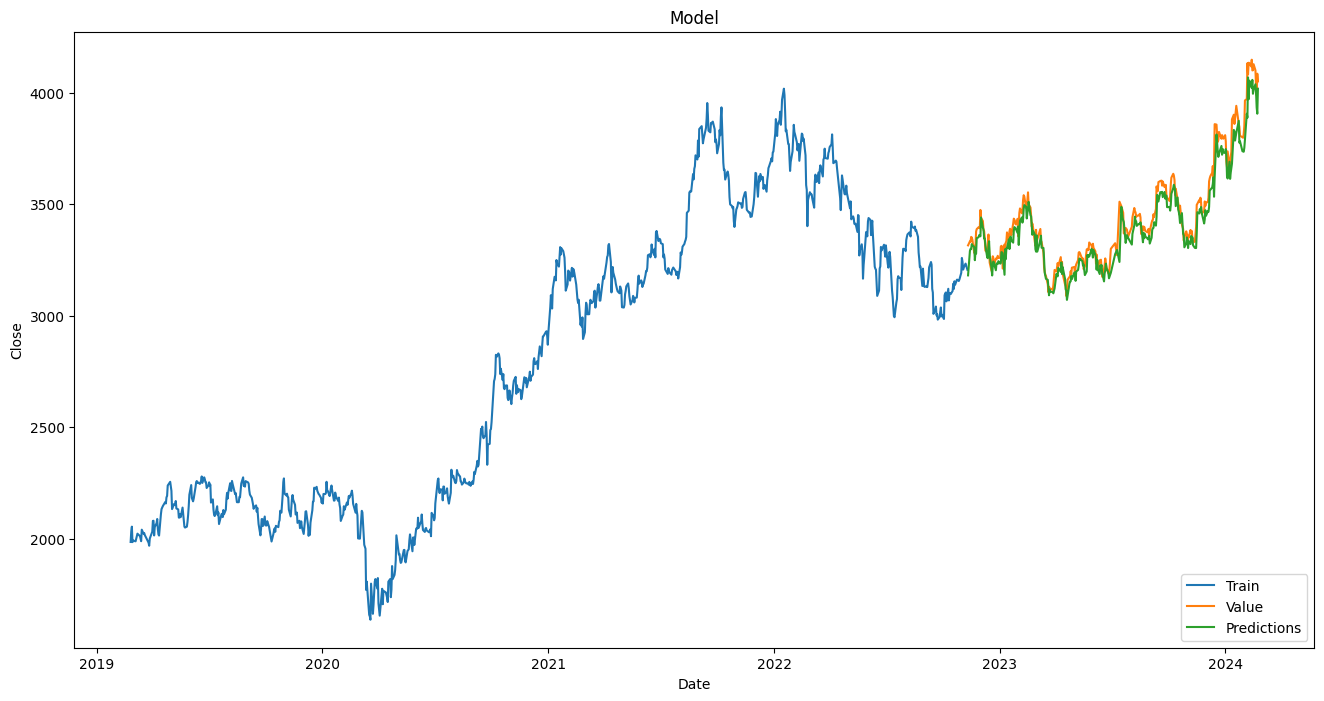

In [37]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Value','Predictions'], loc='lower right')
plt.show()

In [38]:
valid

,Close,Predictions
Date,,
2022-11-11,3316.100098,3181.421875
2022-11-14,3334.050049,3291.116211
2022-11-15,3332.649902,3300.086182
2022-11-16,3354.050049,3299.572754
2022-11-17,3351.399902,3321.574707
...,...,...
2024-02-19,4101.600098,4039.179443
2024-02-20,4029.949951,4002.602051
2024-02-21,3989.300049,3934.398682


In [39]:
print(train['Close'])

Date
2019-02-25    1985.000000
2019-02-26    2032.349976
2019-02-27    2053.750000
2019-02-28    1984.250000
2019-03-01    1991.650024
                 ...     
2022-11-03    3207.149902
2022-11-04    3216.300049
2022-11-07    3234.250000
2022-11-09    3215.949951
2022-11-10    3206.000000
Name: Close, Length: 912, dtype: float64


In [40]:
trace_train = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace_valid = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Value')
trace_predictions = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Define layout
layout = go.Layout(title='Model', xaxis=dict(title='Date'), yaxis=dict(title='Close'), legend=dict(x=0, y=1))

# Create figure
fig = go.Figure(data=[trace_train, trace_valid, trace_predictions], layout=layout)
pio.show(fig)

quote=yf.download("TCS.BO",period=)
new_df=quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test.shape[0],(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)